# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd


def prepare_scoreboard(defeat, draw, victory):
    scoreboard = pd.concat([defeat, draw, victory])
    scoreboard.set_index(pd.Index((i, j) for i in range(len(scoreboard) // 10) for j in range(10)), inplace=True)
    return scoreboard

In [2]:
import os

datapath = os.path.join('datasets', '')

In [3]:
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import numpy as np
from sklearn.linear_model import SGDClassifier

range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv',  usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboard = prepare_scoreboard(defeat, draw, victory)

In [5]:
scoreboard.head(10)

E   A   D   DMG     H   MIT     GAME
0 0   7   3   6  5933  1068  6199   DEFEAT
  1   7   0  10  3601   747     0   DEFEAT
  2   9   1   6  4352     0     0   DEFEAT
  3   7   7   2  2332  6325     0   DEFEAT
  4   6   4   2  3410  5979   606   DEFEAT
  5  14   0   4  4553     0  7781  VICTORY
  6  16   0   3  6120     0  1271  VICTORY
  7  17   0   3  7512  1215     0  VICTORY
  8  15  16   2  4726  6868     0  VICTORY
  9   7  12   1   856  6071   173  VICTORY

In [6]:
scoreboard.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1540 entries, (0, 0) to (153, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       1540 non-null   int64 
 1   A       1540 non-null   int64 
 2   D       1540 non-null   int64 
 3   DMG     1540 non-null   int64 
 4   H       1540 non-null   int64 
 5   MIT     1540 non-null   int64 
 6   GAME    1540 non-null   object
dtypes: int64(6), object(1)
memory usage: 94.4+ KB


In [7]:
scoreboard['GAME'].value_counts()

GAME
DEFEAT     765
VICTORY    765
DRAW        10
Name: count, dtype: int64

In [8]:
scoreboard.describe()

,E,A,D,DMG,H,MIT
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,13.725325,7.490260,6.296753,6246.162338,3887.338961,2306.469481
std,9.916704,8.540195,3.797624,4507.895332,5215.489748,4590.090517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2683.250000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5360.000000,759.500000,239.500000
75%,20.000000,12.000000,9.000000,9450.000000,7558.250000,1801.250000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,28366.000000


In [9]:
import matplotlib.pyplot as plt

# 그림을 저장할 위치
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

그림 저장: attribute_histogram_plots


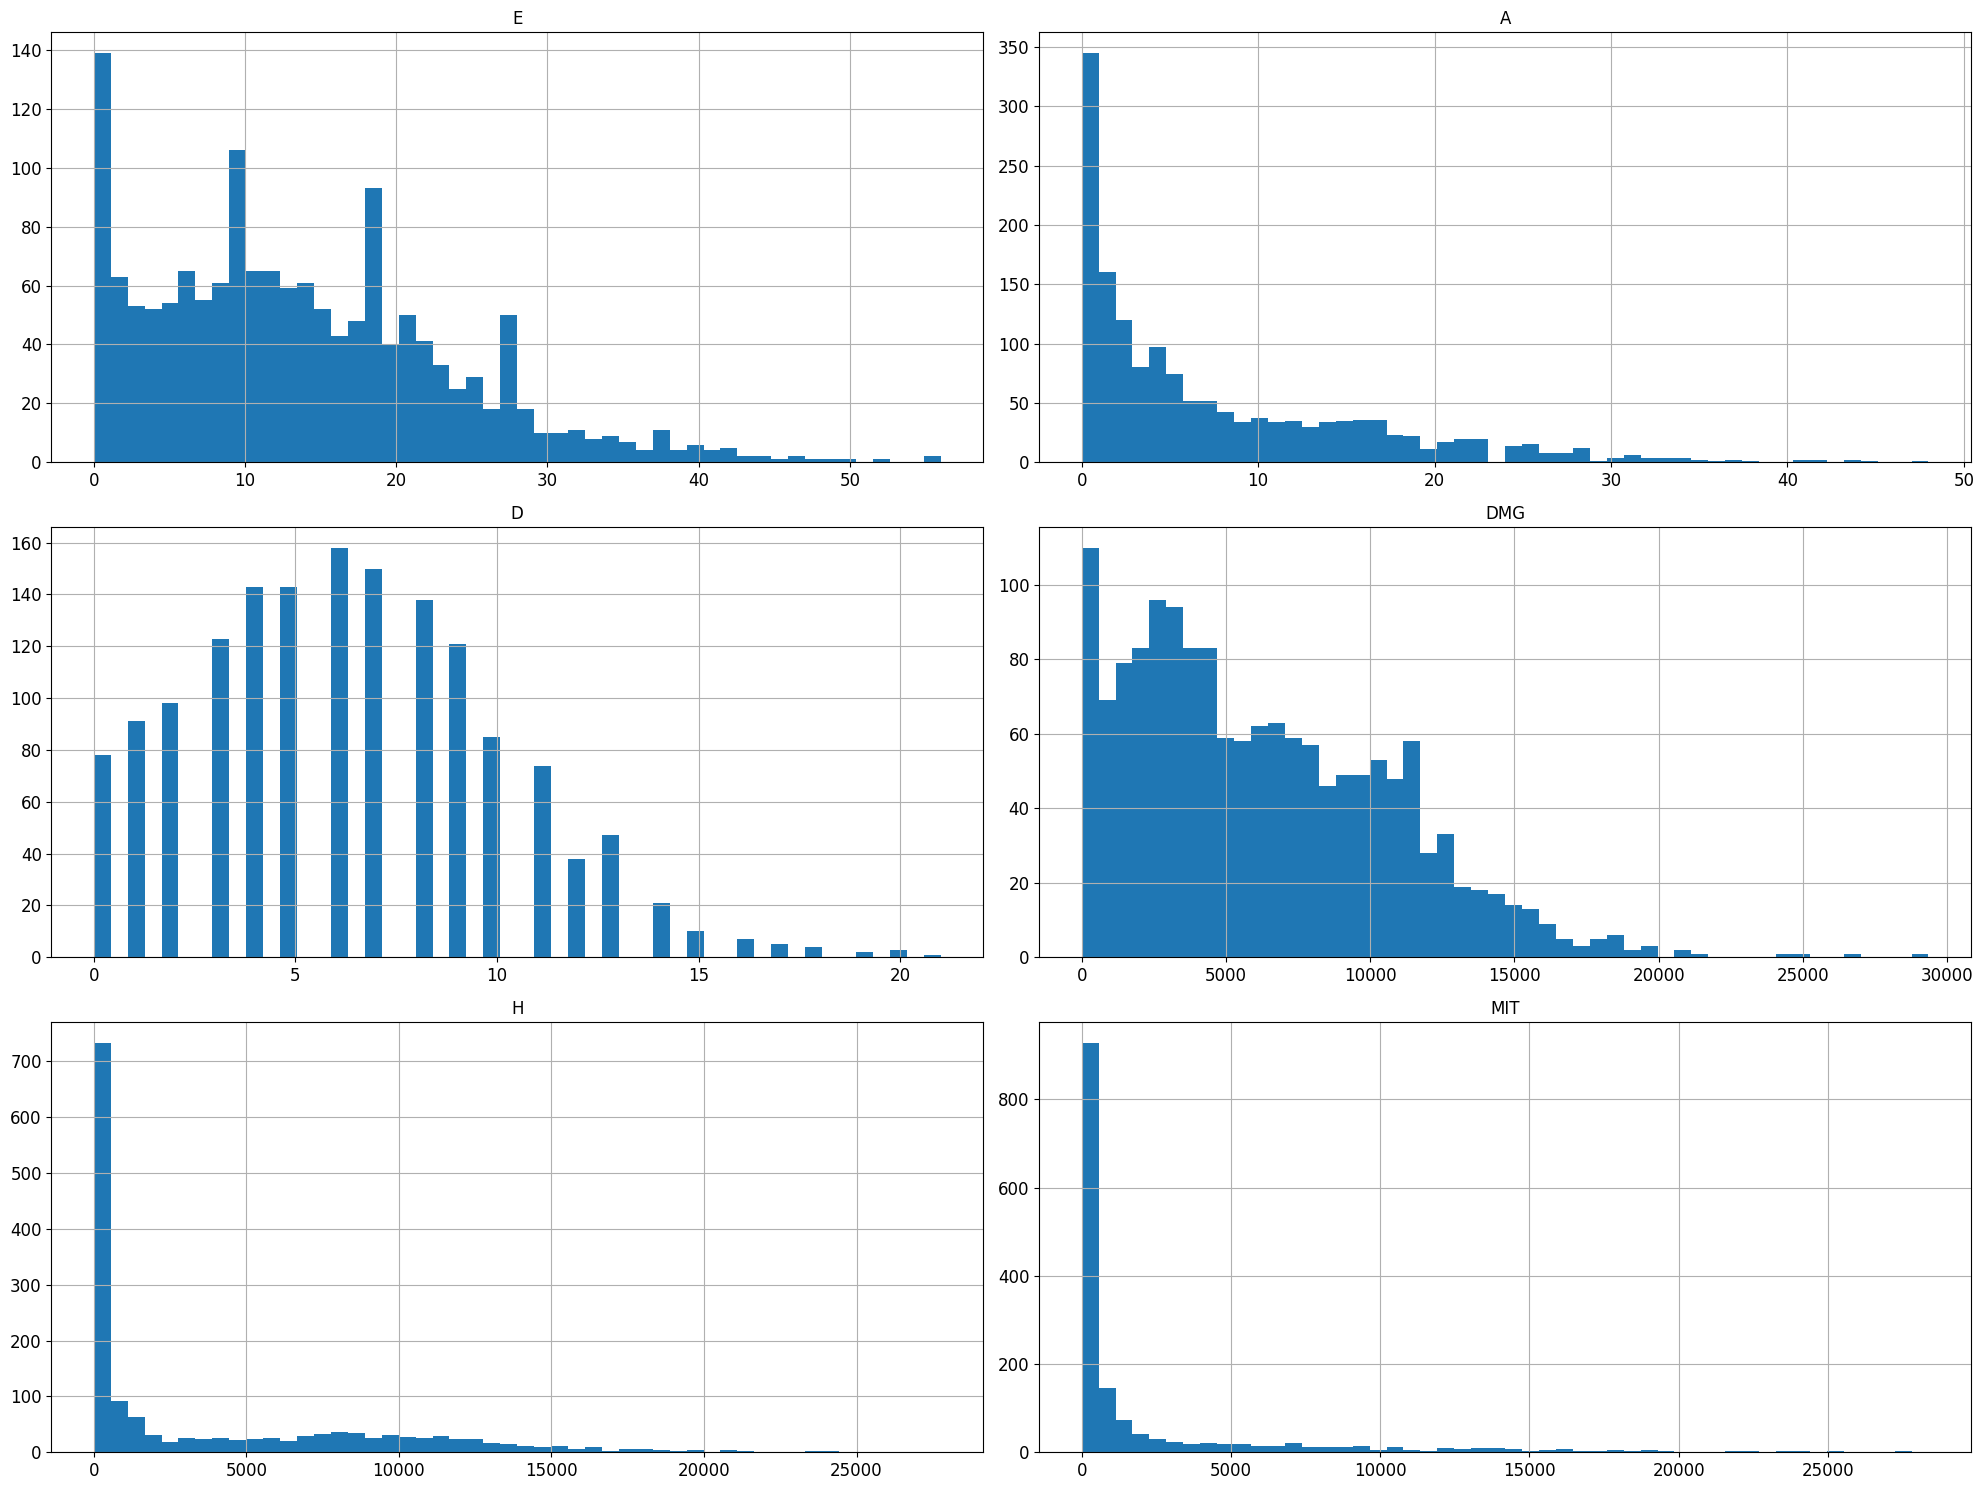

In [10]:
scoreboard.hist(bins=50, figsize=(20, 15))
save_fig('attribute_histogram_plots')
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1)
for train_index, test_index in split.split(scoreboard, scoreboard['GAME']):
    strat_train_set = scoreboard.loc[train_index[train_index % 10 == 0] // 10]
    strat_test_set = scoreboard.loc[test_index[test_index % 10 == 0] // 10]

In [12]:
strat_test_set['GAME'].value_counts() / len(strat_test_set)

GAME
VICTORY    0.5
DEFEAT     0.5
Name: count, dtype: float64

In [13]:
scoreboard['GAME'].value_counts() / len(scoreboard)

GAME
DEFEAT     0.496753
VICTORY    0.496753
DRAW       0.006494
Name: count, dtype: float64

In [14]:
scoreboard = strat_train_set.copy()

In [15]:
scoreboard['E_per_D'] = scoreboard['E'] / scoreboard['D']

In [16]:
scoreboard.describe()

,E,A,D,DMG,H,MIT,E_per_D
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1270.000
mean,13.457364,7.328682,6.208527,6121.607752,3802.504651,2223.455039,inf
std,9.719102,8.263346,3.730538,4340.155682,5039.105115,4391.926690,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
25%,6.000000,1.000000,3.000000,2649.000000,0.000000,0.000000,1.000
50%,12.000000,4.000000,6.000000,5295.500000,674.000000,230.000000,2.000
75%,20.000000,12.000000,9.000000,9301.000000,7516.000000,1692.500000,3.825
max,56.000000,48.000000,20.000000,29354.000000,23702.000000,28366.000000,inf


In [17]:
scoreboard = strat_train_set.drop(['GAME'], axis=1)
scoreboard_labels = strat_train_set['GAME'].copy()[::10]

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = 'E', 'D'
e_ix, d_ix = [scoreboard.columns.get_loc(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.to_numpy(np.float64)
        e = X[:, e_ix]
        d = X[:, d_ix]
        e[e == 0] = 0.5
        d[d == 0] = 0.5
        e_per_d = e / d
        return np.c_[X, e_per_d]


attr_adder = CombinedAttributesAdder()
scoreboard_extra_attribs = attr_adder.transform(scoreboard)

In [19]:
scoreboard_extra_attribs = pd.DataFrame(
    scoreboard_extra_attribs, scoreboard.index, list(scoreboard.columns) + ['E_per_D']
)
scoreboard_extra_attribs.head(10)

E     A     D      DMG        H      MIT   E_per_D
113 0  33.0  10.0   8.0  13853.0      0.0  13461.0  4.125000
    1  19.0   7.0  13.0   7874.0    781.0      0.0  1.461538
    2  28.0   5.0   9.0  13155.0    875.0   2308.0  3.111111
    3  13.0  31.0   8.0   3820.0  13571.0      0.0  1.625000
    4  10.0  22.0   9.0   4469.0  15109.0   1565.0  1.111111
    5  19.0   2.0  11.0  12809.0    480.0  13039.0  1.727273
    6  25.0   1.0  13.0  15363.0    480.0      0.0  1.923077
    7  24.0   1.0   7.0  11094.0      0.0      0.0  3.428571
    8  11.0  17.0  10.0   3488.0  11095.0   1317.0  1.100000
    9  14.0  24.0   6.0   4426.0  12868.0   4461.0  2.333333

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])
scoreboard_tr = full_pipeline.fit_transform(scoreboard)

In [21]:
scoreboard_tr

array([[ 2.01662105,  0.32339852,  0.4788571 , ..., -0.75489184,
         2.55967459,  0.08777213],
       [ 0.56985456, -0.03979134,  1.83441043, ..., -0.5998439 ,
        -0.50645594, -0.40379213],
       [ 1.49991873, -0.28191792,  0.74996776, ..., -0.58118256,
         0.01925755, -0.09934961],
       ...,
       [ 1.08655688, -0.76617107,  1.83441043, ..., -0.75489184,
        -0.50645594, -0.33280812],
       [-0.05018822,  0.68658838,  1.2921891 , ...,  2.31628831,
        -0.31739953, -0.45541686],
       [-0.46355007,  2.13934784,  1.02107843, ...,  2.76932212,
        -0.50645594, -0.50742878]])

In [22]:
scoreboard_prepared = full_pipeline.fit_transform(scoreboard).reshape(-1, 70)

In [23]:
scoreboard_prepared

array([[ 2.01662105,  0.32339852,  0.4788571 , ...,  1.79972653,
         0.50966532, -0.24289505],
       [ 2.84334475, -0.28191792,  1.2921891 , ...,  2.18843828,
        -0.48550029, -0.4120736 ],
       [ 0.77653549, -0.5240445 , -0.06336424, ...,  0.98239953,
        -0.50645594, -0.55049242],
       ...,
       [-0.25686914, -0.5240445 , -0.60558557, ...,  0.74575785,
        -0.50645594, -0.02757689],
       [ 0.77653549, -0.76617107, -1.41891757, ...,  0.2621512 ,
        -0.38299982, -0.62739176],
       [ 0.98321641, -0.03979134,  1.02107843, ...,  2.76932212,
        -0.50645594, -0.50742878]])

In [24]:
scoreboard_prepared.shape

(129, 70)

In [25]:
test_prepared = full_pipeline.transform(strat_test_set.drop(['GAME'], axis=1)).reshape(-1, 70)
test_labels = strat_test_set['GAME'].copy()[::10]

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
sgd_clf.fit(scoreboard_prepared, scoreboard_labels)
sgd_clf.score(test_prepared, test_labels)

0.8

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1)
forest_clf.fit(scoreboard_prepared, scoreboard_labels)
forest_clf.score(test_prepared, test_labels)

0.96

In [28]:
test_labels.values

array(['VICTORY', 'VICTORY', 'VICTORY', 'VICTORY', 'VICTORY', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT', 'DEFEAT', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT', 'DEFEAT', 'VICTORY',
       'DEFEAT'], dtype=object)

In [29]:
sgd_clf.predict(test_prepared)

array(['VICTORY', 'VICTORY', 'DEFEAT', 'DEFEAT', 'DEFEAT', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT', 'DEFEAT', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'VICTORY', 'VICTORY', 'VICTORY',
       'DEFEAT'], dtype='<U7')

In [30]:
forest_clf.predict(test_prepared)

array(['VICTORY', 'VICTORY', 'VICTORY', 'VICTORY', 'VICTORY', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'DEFEAT', 'DEFEAT', 'VICTORY',
       'DEFEAT', 'DEFEAT', 'VICTORY', 'VICTORY', 'DEFEAT', 'VICTORY',
       'DEFEAT'], dtype=object)

In [55]:
feature = '처치', '도움', '죽음', '피해', '치유', '경감', '목숨당 처치'
print('**특성 중요도**')
for s, f in sorted(zip(importances.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

**특성 중요도**
목숨당 처치: 52.2%
죽음: 12.7%
처치: 12.0%
도움: 8.1%
피해: 6.2%
치유: 4.5%
경감: 4.3%


In [33]:
tank = importances[[0, 5]]
damage = importances[[1, 2, 6, 7]]
support = importances[[3, 4, 8, 9]]

In [56]:
feature = '돌격', '공격', '지원'
sum_ = tank.sum(), damage.sum(), support.sum()
print('**역할 중요도**')
for s, f in sorted(zip(sum_, feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

**역할 중요도**
공격: 36.0%
돌격: 35.8%
지원: 28.2%


In [51]:
feature = '공격', '지원'
sum_ = damage.sum() / 2, support.sum() / 2
print('**1인 역할 중요도**')
for s, f in sorted(zip(sum_, feature), reverse=True):
    print(f'{f}: {s * 100:.0f}%')

**1인 역할 중요도**
공격: 18%
지원: 14%


In [65]:
feature = '처치', '도움', '죽음', '피해', '치유', '경감', '목숨당 처치'

print('**돌격 특성 중요도**')
for s, f in sorted(zip(tank.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**공격 특성 중요도**')
for s, f in sorted(zip(damage.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**지원 특성 중요도**')
for s, f in sorted(zip(support.sum(0), feature), reverse=True):
    print(f'{f}: {s * 100:.0f}%')

print()

print('**1인 공격 특성 중요도**')
for s, f in sorted(zip(damage.sum(0) / 2, feature), reverse=True):
    print(f'{f}: {s * 100:.1f}%')

print()

print('**1인 지원 특성 중요도**')
for s, f in sorted(zip(support.sum(0) / 2, feature), reverse=True):
    print(f'{f}: {s * 100:.2f}%')

**돌격 특성 중요도**
목숨당 처치: 19.8%
죽음: 6.6%
처치: 4.4%
도움: 1.7%
피해: 1.6%
경감: 1.3%
치유: 0.4%

**공격 특성 중요도**
목숨당 처치: 22.9%
처치: 5.3%
피해: 2.6%
죽음: 2.0%
치유: 1.9%
도움: 0.8%
경감: 0.6%

**지원 특성 중요도**
목숨당 처치: 9%
도움: 6%
죽음: 4%
경감: 2%
처치: 2%
치유: 2%
피해: 2%

**1인 공격 특성 중요도**
목숨당 처치: 11.5%
처치: 2.6%
피해: 1.3%
죽음: 1.0%
치유: 0.9%
도움: 0.4%
경감: 0.3%

**1인 지원 특성 중요도**
목숨당 처치: 4.73%
도움: 2.83%
죽음: 2.07%
경감: 1.19%
처치: 1.17%
치유: 1.10%
피해: 1.03%
